In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
train_path = 'data/ds3_train.csv'

def load_dataset(data_path, add_intercept = True):
    
    train_data = pd.read_csv(data_path)
    x_train = train_data[['x_1','x_2']]
    t_train = train_data[['t']]
    y_train = train_data[['y']]
    
    x_train = np.array(x_train)
    t_train = np.array(t_train)
    y_train = np.array(y_train)
    
    if add_intercept:
        x0 = np.ones((x_train.shape[0],1))
        x_train = np.hstack((x0,x_train))
        
    return x_train, t_train, y_train
    

In [111]:
train_path = 'data/ds3_train.csv'
val_path = 'data/ds3_valid.csv'
test_path = 'data/ds3_test.csv'

x_train, t_train, y_train = load_dataset(train_path, add_intercept = True); print(x_train.shape)

x_val, t_val, y_val = load_dataset(val_path, add_intercept = True); print(x_val.shape)

x_test, t_test, y_test = load_dataset(test_path, add_intercept = True); print(x_test.shape)

(1250, 3)
(124, 3)
(124, 3)


In [153]:
def sigmoid(x, theta):
    ''' x: nxm
        theta: mx1'''
    return 1./(1+np.exp(-np.dot(x, theta)))

def MSE(y_hat,y):
    ''' (1xn).(nx1)'''
    return np.mean(np.dot((y_hat-y).T, (y_hat-y)))

def get_accuracy(y_hat,y, alpha=None):
    
    accuracy_counter = 0
    pred_labels = np.zeros((y_hat.shape[0],1))
          
    if alpha:
        for i in range(pred_labels.shape[0]):
            if y_hat[i]/alpha>=0.5:
                pred_labels[i]=1

                
    else:

        for i in range(pred_labels.shape[0]):
            if y_hat[i]>=0.5:
                pred_labels[i]=1

    accuracy_counter = 0
    for i in range(y_hat.shape[0]):
        if pred_labels[i]==y[i]:
            accuracy_counter+=1
                
    return np.round(100*accuracy_counter/y_hat.shape[0], 3)
    

def make_plot(x,y, theta):

    plt.scatter(x[:,1], x[:,2],c=y, alpha=0.3)
    
    x1 = np.linspace(min(x[:,1]), max(x[:,2]), 100)
    # decision boundary: (theta).T,X = 0 : x0*theta0 + x1theta1 +x2*theta2 = 0 ; x0=1
    theta0 = theta[0]
    theta1 = theta[1]
    theta2 = theta[2]
    x2 = -theta1/theta2 * x1 -theta0/theta2 * 1
    plt.plot(x1, x2, color='r')



In [128]:
# Part-2c :  Logsitic regression

max_itrs = 2000
lr = 0.1

# Parameter Initialization
theta = np.random.random((x_train.shape[1],1)); print('Initialized theta: ', theta, 'shape:', theta.shape)

train_losses = []
val_losses = []
temp = 10000
# Batch Gradient Descent

print('------------------------Begin Training-------------------------')

for itr in range(max_itrs):
    t_hat_train = sigmoid(x_train, theta)
    train_loss = MSE(t_hat_train,t_train)
    train_losses.append(train_loss)
    train_acc = get_accuracy(t_hat_train, t_train)
    
    # check validation data:
    
    t_hat_val = sigmoid(x_val, theta)
    val_loss = MSE(t_hat_val,t_val)
    val_losses.append(val_loss)
    val_acc = get_accuracy(t_hat_val, t_val)
    
    if (itr+1)%500==0 or itr==0:
        print('Itr: ', itr+1, 'train loss: ', np.round(train_loss,3), 'train accuracy: ', train_acc, 'val loss: ', np.round(val_loss,3), 'val accuracy: ', val_acc)
    
    # perform gradient descent on Train data
    
    theta = theta - lr/t_train.shape[0]*(np.dot(x_train.T, t_hat_train-t_train))
    
    # Early stopping:
    
    if val_loss>temp:
        print('Early stopping at ', itr+1)
        max_itrs = itr+1 
        break
    temp = val_loss
    


              

Initialized theta:  [[0.26927276]
 [0.48754768]
 [0.94149292]] shape: (3, 1)
------------------------Begin Training-------------------------
Itr:  1 train loss:  65.099 train accuracy:  93.84 val loss:  7.734 val accuracy:  92.742
Itr:  500 train loss:  33.286 train accuracy:  96.32 val loss:  4.862 val accuracy:  95.968
Itr:  1000 train loss:  32.091 train accuracy:  96.24 val loss:  4.81 val accuracy:  95.161
Itr:  1500 train loss:  31.725 train accuracy:  96.4 val loss:  4.793 val accuracy:  95.161
Itr:  2000 train loss:  31.57 train accuracy:  96.24 val loss:  4.785 val accuracy:  95.968


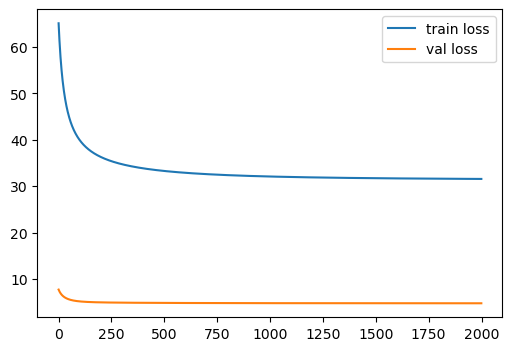

In [129]:
plt.figure(figsize=(6,4))
plt.plot(range(max_itrs), train_losses, label = 'train loss')
plt.plot(range(max_itrs), val_losses, label = 'val loss')
plt.legend()

In [130]:
# predictions on test set
t_hat_test = sigmoid(x_test, theta)
test_acc = get_accuracy(t_hat_test, t_test)
print('Test accuracy: ', test_acc)

Test accuracy:  98.387


Text(0.5, 1.0, 'Test data')

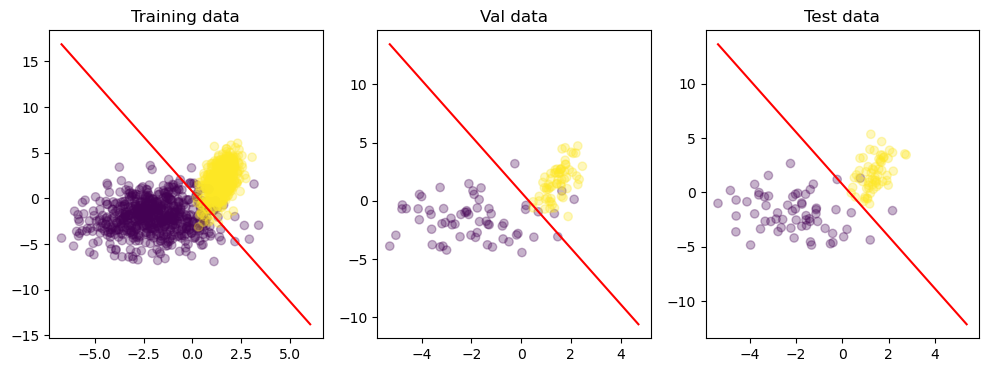

In [131]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
make_plot(x_train,t_train,theta)
plt.title('Training data')

plt.subplot(1,3,2)
make_plot(x_val,t_val,theta)
plt.title('Val data')

plt.subplot(1,3,3)
make_plot(x_test,t_test,theta)
plt.title('Test data')

In [132]:
# part2d

available_data_positions = np.where(y_train==1)[0]

print('Available labelled data with only Class-1 is: ', available_data_positions.shape[0])

# Filter the data for Training

x_train = x_train[available_data_positions]; print(x_train.shape)
y_train = y_train[available_data_positions]; print(y_train.shape)
t_train = t_train[available_data_positions]; print(t_train.shape)

Available labelled data with only Class-1 is:  125
(125, 3)
(125, 1)
(125, 1)


In [133]:
# I am using t_train in training loop [because I could copy paste the code from part -c]. Ideally I should use y_train. 
# But if y_train==1 then t_train==1. So, does not matter. (ALso, P(t==1|y==1)=1)

max_itrs = 2000
lr = 0.1

# Parameter Initialization
theta = np.random.random((x_train.shape[1],1)); print('Initialized theta: ', theta, 'shape:', theta.shape)

train_losses = []
val_losses = []

# Batch Gradient Descent

print('------------------------Begin Training-------------------------')

for itr in range(max_itrs):
    t_hat_train = sigmoid(x_train, theta)
    train_loss = MSE(t_hat_train,t_train)
    train_losses.append(train_loss)
    train_acc = get_accuracy(t_hat_train, t_train)
    
    # check validation data:
    
    t_hat_val = sigmoid(x_val, theta)
    val_loss = MSE(t_hat_val,t_val)
    val_losses.append(val_loss)
    val_acc = get_accuracy(t_hat_val, t_train)
    
    if (itr+1)%500==0 or itr==0:
        print('Itr: ', itr+1, 'train loss: ', np.round(train_loss,3), 'train accuracy: ', train_acc, 'val loss: ', np.round(val_loss,3), 'val accuracy: ', val_acc)
    
    # perform gradient descent on Train data
    
    theta = theta - lr/t_train.shape[0]*(np.dot(x_train.T, t_hat_train-t_train))


              

Initialized theta:  [[0.23935797]
 [0.83666096]
 [0.06273217]] shape: (3, 1)
------------------------Begin Training-------------------------
Itr:  1 train loss:  4.517 train accuracy:  100.0 val loss:  9.299 val accuracy:  57.258
Itr:  500 train loss:  0.081 train accuracy:  100.0 val loss:  9.363 val accuracy:  59.677
Itr:  1000 train loss:  0.025 train accuracy:  100.0 val loss:  10.498 val accuracy:  59.677
Itr:  1500 train loss:  0.012 train accuracy:  100.0 val loss:  11.129 val accuracy:  60.484
Itr:  2000 train loss:  0.007 train accuracy:  100.0 val loss:  11.548 val accuracy:  60.484


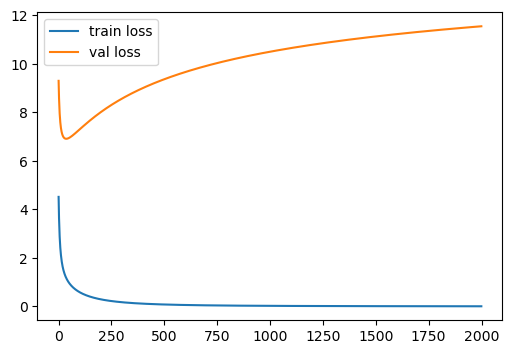

In [134]:
plt.figure(figsize=(6,4))
plt.plot(range(max_itrs), train_losses, label = 'train loss')
plt.plot(range(max_itrs), val_losses, label = 'val loss')
plt.legend()

In [135]:
# predictions on test set
t_hat_test = sigmoid(x_test, theta)
test_acc = get_accuracy(t_hat_test, t_test)
print('Test accuracy: ', test_acc)

Test accuracy:  91.935


Text(0.5, 1.0, 'Test data')

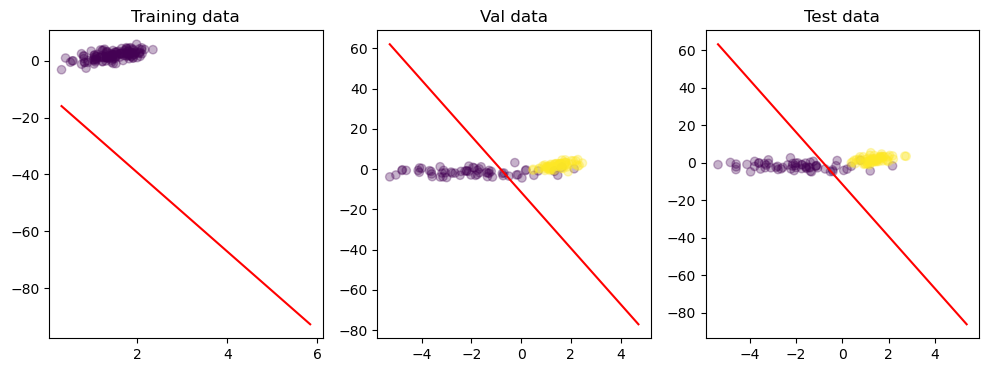

In [136]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
make_plot(x_train,t_train,theta)
plt.title('Training data')

plt.subplot(1,3,2)
make_plot(x_val,t_val,theta)
plt.title('Val data')

plt.subplot(1,3,3)
make_plot(x_test,t_test,theta)
plt.title('Test data')

In [138]:
# to prevent overfitting: I will stop if val loss starts to increase

# I am using t_train in training loop [because I could copy paste the code from part -c]. Ideally I should use y_train. 
# But if y_train==1 then t_train==1. So, does not matter. (ALso, P(t==1|y==1)=1)

max_itrs = 2000
lr = 0.1

# Parameter Initialization
theta = np.random.random((x_train.shape[1],1)); print('Initialized theta: ', theta, 'shape:', theta.shape)

train_losses = []
val_losses = []

temp = 100000
# Batch Gradient Descent

print('------------------------Begin Training-------------------------')

for itr in range(max_itrs):
    t_hat_train = sigmoid(x_train, theta)
    train_loss = MSE(t_hat_train,t_train)
    train_losses.append(train_loss)
    train_acc = get_accuracy(t_hat_train, t_train)
    
    # check validation data:
    
    t_hat_val = sigmoid(x_val, theta)
    val_loss = MSE(t_hat_val,t_val)
    val_losses.append(val_loss)
    val_acc = get_accuracy(t_hat_val, t_train)
    
    if (itr+1)%500==0 or itr==0:
        print('Itr: ', itr+1, 'train loss: ', np.round(train_loss,3), 'train accuracy: ', train_acc, 'val loss: ', np.round(val_loss,3), 'val accuracy: ', val_acc)
    
    # perform gradient descent on Train data
    
    theta = theta - lr/t_train.shape[0]*(np.dot(x_train.T, t_hat_train-t_train))
    
    # Early stopping:
    
    if val_loss>temp:
        print('Early stopping at ', itr+1)
        max_itrs = itr+1
        break
    temp = val_loss
    

Initialized theta:  [[0.69489345]
 [0.29973397]
 [0.82441737]] shape: (3, 1)
------------------------Begin Training-------------------------
Itr:  1 train loss:  4.249 train accuracy:  97.6 val loss:  10.613 val accuracy:  60.484
Early stopping at  63


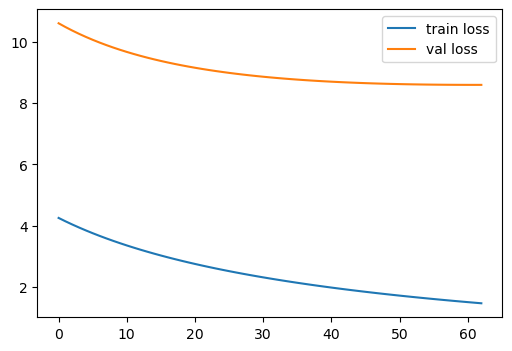

In [139]:
plt.figure(figsize=(6,4))
plt.plot(range(max_itrs), train_losses, label = 'train loss')
plt.plot(range(max_itrs), val_losses, label = 'val loss')
plt.legend()

In [140]:
# predictions on test set
t_hat_test = sigmoid(x_test, theta)
test_acc = get_accuracy(t_hat_test, t_test)
print('Test accuracy: ', test_acc)

Test accuracy:  94.355


Text(0.5, 1.0, 'Test data')

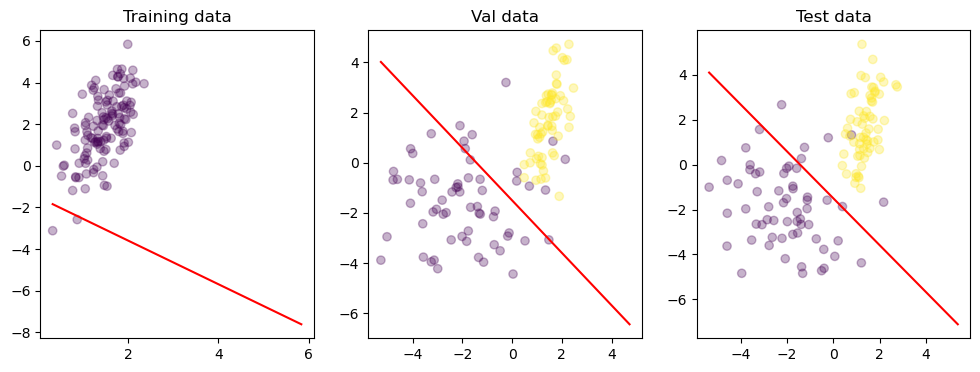

In [141]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
make_plot(x_train,t_train,theta)
plt.title('Training data')

plt.subplot(1,3,2)
make_plot(x_val,t_val,theta)
plt.title('Val data')

plt.subplot(1,3,3)
make_plot(x_test,t_test,theta)
plt.title('Test data')

In [152]:
h_x_is = np.sum(sigmoid(x_train,theta)); 
V_plus = available_data_positions.shape[0]
alpha = h_x_is/ V_plus
print('$ alpha $ : ', alpha)

$ alpha $ :  0.9477585955679756


In [164]:
# scaling part-d
# to prevent overfitting: I will stop if val loss starts to increase

# I am using t_train in training loop [because I could copy paste the code from part -c]. Ideally I should use y_train. 
# But if y_train==1 then t_train==1. So, does not matter. (ALso, P(t==1|y==1)=1)

max_itrs = 2000
lr = 0.1

# Parameter Initialization
theta = np.random.random((x_train.shape[1],1)); print('Initialized theta: ', theta, 'shape:', theta.shape)

train_losses = []
val_losses = []

temp = 100000
# Batch Gradient Descent

print('------------------------Begin Training-------------------------')

for itr in range(max_itrs):
    t_hat_train = sigmoid(x_train, theta)
    train_loss = MSE(t_hat_train,t_train)
    train_losses.append(train_loss)
    train_acc = get_accuracy(t_hat_train, t_train)
    
    # check validation data:
    
    t_hat_val = sigmoid(x_val, theta)
    val_loss = MSE(t_hat_val,t_val)
    val_losses.append(val_loss)
    val_acc = get_accuracy(t_hat_val, t_train, alpha) # use alpha only in prediction i.e hypothesis state
    
    if (itr+1)%500==0 or itr==0:
        print('Itr: ', itr+1, 'train loss: ', np.round(train_loss,3), 'train accuracy: ', train_acc, 'val loss: ', np.round(val_loss,3), 'val accuracy: ', val_acc)
    
    # perform gradient descent on Train data
    
    theta = theta - lr/t_train.shape[0]*(np.dot(x_train.T, t_hat_train-t_train))
    
    # Early stopping:
    
    if val_loss>temp:
        print('Early stopping at ', itr+1)
        max_itrs = itr+1
        break
    temp = val_loss
    

Initialized theta:  [[0.62207904]
 [0.01040691]
 [0.97938947]] shape: (3, 1)
------------------------Begin Training-------------------------
Itr:  1 train loss:  6.493 train accuracy:  95.2 val loss:  14.654 val accuracy:  65.323
Early stopping at  90


In [165]:
# predictions on test set
t_hat_test = sigmoid(x_test, theta)
test_acc = get_accuracy(t_hat_test, t_test)
print('Test accuracy: ', test_acc)

Test accuracy:  93.548


In [166]:
# predictions on test set
t_hat_test = sigmoid(x_test, theta)
test_acc = get_accuracy(t_hat_test, t_test,alpha)
print('Test accuracy: ', test_acc)

Test accuracy:  92.742
